**Group 26**

**Names**: student number

**Pedro Cerejeira**: 20230442<br>
**Diogo Reis**: 20230481<br>
**Marta Jesus**: 20230464

**1. Imports and Reading the Data:**

In [55]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.exceptions import DataConversionWarning

# Ignore DataConversion warnings for LinearRegression later on
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn')

In [3]:
# Read/Import dataset
data = pd.read_csv('XYZ_sports_dataset.csv', delimiter = ';')

In [4]:
df = data.copy()

**2. Exploratory Analysis:** 

**2.1 Checking and fixing Types:** 

In [5]:
df_types = df.copy()

In [6]:
# Exploring Types
df_types.dtypes

ID                              int64
Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
DanceActivities               float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
NatureActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOf

Here we can conclude that some columns' types must be changed:

note: for the column **Income**, we are keeping the float type, even though it could be converted to integer


In [7]:
# Change the data types of the columns
columns_to_change = {
    'UseByTime': 'bool',
    'AthleticsActivities': 'bool',
    'WaterActivities': 'bool',
    'FitnessActivities': 'bool',
    'DanceActivities': 'bool',
    'TeamActivities': 'bool',
    'RacketActivities': 'bool',
    'CombatActivities': 'bool',
    'NatureActivities': 'bool',
    'SpecialActivities': 'bool',
    'OtherActivities': 'bool',
    'NumberOfFrequencies': 'Int64',
    'AllowedWeeklyVisitsBySLA': 'Int64',
    'HasReferences': 'bool',
    'Dropout': 'bool'
}
df_types = df_types.astype(columns_to_change)

In [8]:
# Confirm the new column types
df_types.dtypes

ID                              int64
Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                        bool
AthleticsActivities              bool
WaterActivities                  bool
FitnessActivities                bool
DanceActivities                  bool
TeamActivities                   bool
RacketActivities                 bool
CombatActivities                 bool
NatureActivities                 bool
SpecialActivities                bool
OtherActivities                  bool
NumberOfFrequencies             Int64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA        Int64
AllowedNumberOfVisitsBySLA    float64
RealNumberOf

**2.2 Fill missing values (Data imputation):** 

In [9]:
df_nan = df_types.copy()

In [10]:
# count of missing values
df_nan.isna().sum()

ID                              0
Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities             0
WaterActivities                 0
FitnessActivities               0
DanceActivities                 0
TeamActivities                  0
RacketActivities                0
CombatActivities                0
NatureActivities                0
SpecialActivities               0
OtherActivities                 0
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                   0
NumberOfRefere

**a) Income nans**

Income and Age should have a high correlation, lets check.

In [11]:
# Finding the correlation between Income and Age

df_nan['Income'].corr(df_nan['Age'])

0.8753525249372762

Okay, 0.875 is a very high correlation, lets use Age in order to estimate the 'nans' in Income<br>

In order to best compute Income estimations, can we assume that individuals under 16 years old have no Income?

In [12]:
# Filter the DataFrame to select individuals under 16 with non-zero income
under_16_percentage_with_income = len(df_nan[(df_nan['Age'] < 16) & (df_nan['Income'] > 0)]) / len(df_nan[df_nan['Age'] < 16]) * 100
print(under_16_percentage_with_income)

0.8583690987124464


Roughly 0.86% of individuals under 16 have an income, this is residual, we will study them later as outliers. For now lets fill the nan values

For individuals under 16 years old, lets fill nan Incomes as 0. 

For the ones above 16 years old, we could use the mean for each age, although, **given the high correlation, a linear regression model can provide a more precise estimation for the missing income values based on age**. It can capture the linear trend between the two variables more effectively.

In [13]:
len(df_nan[(df_nan['Age'] < 16) & df_nan['Income'].isna()])

340

Lets fill all these rows with 0 Income

In [14]:
df_nan.loc[(df_nan['Age'] < 16) & df_nan['Income'].isna(), 'Income'] = 0

Lets now check the correlation once again

In [15]:
# Finding the new correlation between Income and Age

df_nan['Income'].corr(df_nan['Age'])

0.8797464709549547

Okay the correlation is better, ~ 0.88 now, lets see how many nans are still in Income, we only handled under 16 years old

In [16]:
# count of missing values
df_nan.isna().sum()

ID                              0
Age                             0
Gender                          0
Income                        155
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities             0
WaterActivities                 0
FitnessActivities               0
DanceActivities                 0
TeamActivities                  0
RacketActivities                0
CombatActivities                0
NatureActivities                0
SpecialActivities               0
OtherActivities                 0
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                   0
NumberOfRefere

Now for the **individuals above 15 years old, who can receive income**, lets compute a LinearRegression with X = Age, Y = Income

In [17]:
# Filter the data for individuals with valid 'Age' and 'Income' values, LinearRegression requires no nans
regression_data = df_nan.dropna(subset=['Age', 'Income'])

# Filter further for individuals 16+ years old
regression_data = regression_data[regression_data['Age'] >= 16]

X = regression_data[['Age']]
y = regression_data['Income']

model = LinearRegression()
model.fit(X, y)

# Create a range of ages from the minimum to the maximum age in the dataset (16+ years old)
ages_to_estimate = range(regression_data['Age'].min(), regression_data['Age'].max() + 1)

estimated_incomes = model.predict(np.array(ages_to_estimate).reshape(-1, 1))

income_estimates_df = pd.DataFrame({
    'Age': ages_to_estimate,
    'Estimated_Income': estimated_incomes
})

print(income_estimates_df)

    Age  Estimated_Income
0    16       1347.610653
1    17       1439.352623
2    18       1531.094594
3    19       1622.836564
4    20       1714.578534
..  ...               ...
67   83       7494.322659
68   84       7586.064630
69   85       7677.806600
70   86       7769.548570
71   87       7861.290540

[72 rows x 2 columns]


Lets now fill the nan values with this estimatives

In [18]:
# Lets use our income estimates to fill the nan values. First we need this as a dict
age_to_income_map = income_estimates_df.set_index('Age')['Estimated_Income'].to_dict()

# Now, fill NaN values in the 'Income' column based on the 'Age' column
df_nan['Income'] = df_nan['Income'].fillna(df_nan['Age'].map(age_to_income_map))

In [19]:
# count of missing values
df_nan.isna().sum()

ID                              0
Age                             0
Gender                          0
Income                          0
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities             0
WaterActivities                 0
FitnessActivities               0
DanceActivities                 0
TeamActivities                  0
RacketActivities                0
CombatActivities                0
NatureActivities                0
SpecialActivities               0
OtherActivities                 0
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                   0
NumberOfRefere

**b) NumberOfFrequencies nans**

For this column, since the number of nan values is low, lets use the median to better fill null values (median is more resistant to outliers)

In [20]:
df_nan["NumberOfFrequencies"].fillna(round(df_nan["NumberOfFrequencies"].median(), 0), inplace=True)

In [21]:
df_nan.isna().sum()

ID                              0
Age                             0
Gender                          0
Income                          0
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities             0
WaterActivities                 0
FitnessActivities               0
DanceActivities                 0
TeamActivities                  0
RacketActivities                0
CombatActivities                0
NatureActivities                0
SpecialActivities               0
OtherActivities                 0
NumberOfFrequencies             0
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                   0
NumberOfRefere

**c) AllowedWeeklyVisitsBySLA nans**

In [22]:
# Lets see the correlations of all features with the 'AllowedWeeklyVisitsBySLA'
correlation = df_nan.corr(numeric_only = True)
print(correlation['AllowedWeeklyVisitsBySLA'])

ID                           -0.010065
Age                           0.325009
Income                        0.340250
DaysWithoutFrequency         -0.010745
LifetimeValue                -0.313973
UseByTime                     0.111208
AthleticsActivities           0.013278
WaterActivities              -0.508906
FitnessActivities             0.590177
DanceActivities              -0.006378
TeamActivities               -0.221530
RacketActivities             -0.238044
CombatActivities              0.140373
NatureActivities              0.001405
SpecialActivities            -0.004121
OtherActivities              -0.040638
NumberOfFrequencies           0.018983
AttendedClasses              -0.457603
AllowedWeeklyVisitsBySLA      1.000000
AllowedNumberOfVisitsBySLA    0.674750
RealNumberOfVisits            0.161604
NumberOfRenewals             -0.186779
HasReferences                -0.169852
NumberOfReferences           -0.166547
Dropout                       0.184497
Name: AllowedWeeklyVisits

Since 'AllowedWeeklyVisitsBySLA' doesn't have a high correlation with another feature, instead of using the linear regression, we will fill the NANs with the median like we did for the 'NumberOfFrequencies' column

In [23]:
df_nan["AllowedWeeklyVisitsBySLA"].fillna(round(df_nan["AllowedWeeklyVisitsBySLA"].median(), 0), inplace=True)

In [24]:
df_nan.isna().sum()

ID                            0
Age                           0
Gender                        0
Income                        0
EnrollmentStart               0
EnrollmentFinish              0
LastPeriodStart               0
LastPeriodFinish              0
DateLastVisit                 0
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
DanceActivities               0
TeamActivities                0
RacketActivities              0
CombatActivities              0
NatureActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
HasReferences                 0
NumberOfReferences            0
Dropout                       0
dtype: i

**2.2 Checking outliers:** 

In [25]:
df_outliers = df_nan.copy()

In [62]:
# Define metric and non-metric features, to use later on
metric_features = ["Age", "Income", "DaysWithoutFrequency", "LifetimeValue", "NumberOfFrequencies", "AttendedClasses", "AllowedWeeklyVisitsBySLA", "AllowedNumberOfVisitsBySLA", "RealNumberOfVisits", "NumberOfRenewals", "NumberOfReferences"]
non_metric_features = df_outliers.columns.drop(metric_features).to_list()

**a) "Manually" filtering the dataset's outliers.** Lets go back to the Age/Income relationship outliers

Remember that "Roughly 0.86% of individuals under 16 have an income", lets try to find some outliers here

In [26]:
# Filter the DataFrame to select individuals under 18 years old with non-zero income
under_18_with_income = df_outliers[(df_outliers['Age'] <= 18) & (df_outliers['Income'] > 0)]

# From the found individuals, group the data by 'Age', count the entries. How many kids(total) have income per age
age_groups = under_18_with_income.groupby('Age').size()

# How many individuals exist for each age group (total)
total_counts = df_outliers[df_outliers['Age'] <= 18].groupby('Age').size()

# Calculate the percentage of individuals with income for each age group
percentage_by_age = (age_groups / total_counts * 100).fillna(0)

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Percentage': percentage_by_age})
result_df.index.name = 'Age'

# Print or display the result
print(result_df)

     Percentage
Age            
0      0.000000
1      0.000000
2      0.938967
3      0.000000
4      0.574713
5      1.111111
6      0.000000
7      0.000000
8      0.000000
9      0.675676
10     0.000000
11     0.793651
12     0.000000
13     1.694915
14     1.492537
15     5.325444
16    21.134021
17   100.000000
18   100.000000


We found some outliers for sure, it is almost impossible for a 2 year old to have an Income.

We need to make a decision here. Lets assume that, if the percentage of individuals with Income in an age group is **less than 2%**, they are **outliers**. Lets drop them

In [27]:
# You can see from the DataFrame that, all the individuals below 15 years old which have an income, 
# belong to less than 2% of their age groups, so we can remove them with this logic
filters1 = ~((df_outliers['Age'] < 15) & (df_outliers['Income'] > 0))
df_1 = df_outliers[filters1]

In [28]:
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df_outliers.shape[0], 3) * 100, '%')

Percentage of data kept after removing outliers: 99.9 %


**b) Outlier removal using only the IQR method**

IQR method is good for normally distributed variables, lets analyze our variables distribution

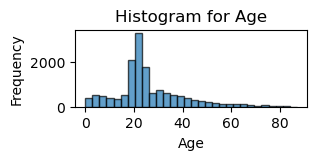

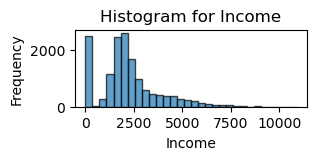

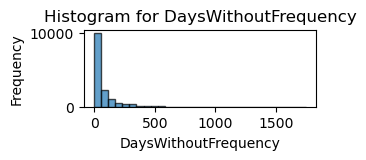

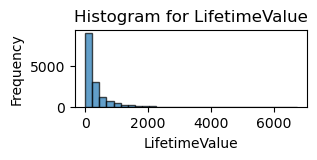

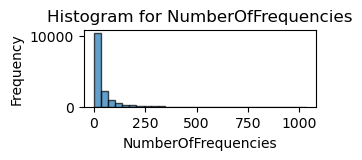

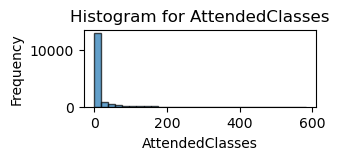

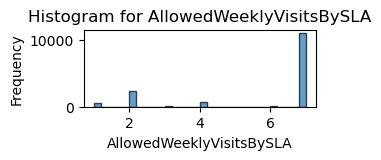

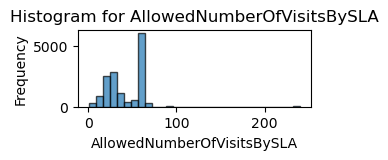

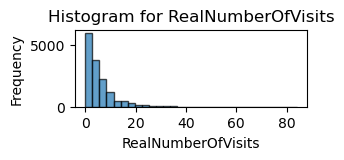

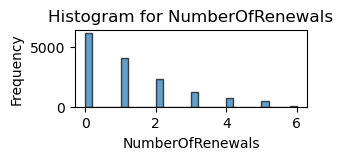

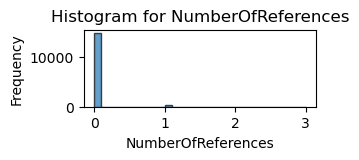

In [63]:
# Plot histograms for each metric feature
for feature in metric_features:
    plt.figure(figsize=(3,1))
    df_outliers[feature].hist(bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

From the visual inspection, none of the distributions are perfectly normal, but Age is the closest. The rest are right-skewed or appear categorical. IQR wouldn't be very good, but let's try it out either way to prove this

In [70]:
q25 = df[metric_features].quantile(.25)
q75 = df[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 26 * iqr
lower_lim = q25 - 26 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df_outliers[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0))

# Use the filters to remove outliers from df_outliers
df_2 = df_outliers[filters2]

# Calculate the percentage of data kept after removing more outliers
print('Percentage of data kept after removing outliers with IQR method:', np.round(df_2.shape[0] / df_outliers.shape[0], 3) * 100, '%')

Percentage of data kept after removing outliers with IQR method: 95.1 %


This value is too big, as we thought.

Since we don't want to remove 1/3 of our dataset as outliers, lets try another approach

**c) Outlier removal using Visual Inspection**

First lets work with metric features

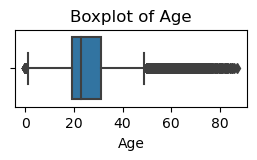

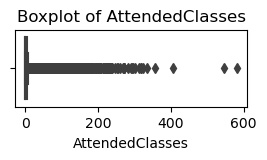

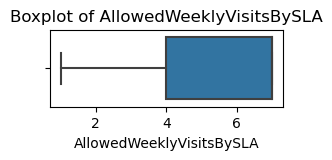

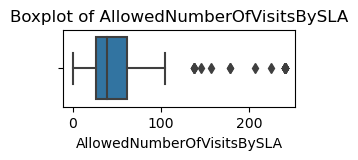

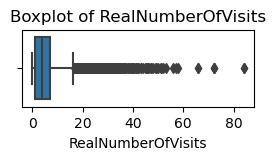

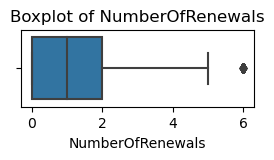

In [57]:
# Create a boxplot for each metric feature
for feature in metric_features:
    plt.figure(figsize=(3, 1))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [32]:
df_3 = df_outliers[(filters1 | filters2)]
print('Percentage of data kept after removing outliers:', np.round(df_3.shape[0] / df_outliers.shape[0], 3) * 100, '%')

Percentage of data kept after removing outliers: 99.9 %
